# Ciencia de datos aplicada

## Segunda Entrega del Proyecto

### Contexto
Para la segunda entrega del proyecto actual, se espera realizar el modelo clasificatorio para la caracterización de los usuario de la aplicación de Chiper.
Para este caso, contamos con un total de 2 datasets, que contienen información de los meses de Septiembre y Octubre de 2021, esto con el fin de identificar el comportamiento de los clientes en este periodo de tiempo. Para este primer data set, contamos con 12.385 registros o filas con 18 campos diferentes. Esta información corresponde a un total de 6.236 usuarios.
Los datos obtenidos son de las fechas 2021-09-01  al 2021-09-30, por lo cual contamos con 60 días de información, lo que nos permitirá realizar la evaluación temporal del comportamiento de las tiendas.

### Objetivos

1. Proponer a una organización, una idea o problema a abordar desde la ciencia de datos.
2. Proponer un modelo predictivo inicial para la organización que de una solución al problema.


### 0.Instalación y Análisis Exploratorio

In [ ]:
#Instalar plotly
!pip install plotly

In [ ]:
#Instalar Pandas Profiling
%%shell
shred -u setup_colab_general.py
wget -q "https://github.com/jpcano1/python_utils/raw/main/setup_colab_general.py" -O setup_colab_general.py
pip install -q https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
pip install -q tqdm==4.56.0
pip install -q --upgrade imbalanced-learn

In [ ]:
!pip uninstall pandas_profiling

Found existing installation: pandas-profiling 3.1.1
Uninstalling pandas-profiling-3.1.1:
  Would remove:
    /usr/local/bin/pandas_profiling
    /usr/local/lib/python3.7/dist-packages/pandas_profiling-3.1.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/pandas_profiling/*
Proceed (y/n)? 

In [ ]:
#Instalar pandas profiling
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip (25.9 MB)
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=926a94533b53d01b6fa6da0e0dc2dfc55c8869747102088a4f84475e264327f7
  Stored in directory: /tmp/pip-ephem-wheel-cache-r9sd3otw/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
Successfully built pandas-profiling


In [ ]:
!pip install gower

In [ ]:
# Importar las librerías necesarias según el análisis que se vaya a realizar
# Librería para manejo de datos
import pandas as pd

# Librerías para graficar
import seaborn as sns
import plotly.express as px

# Gráficas estáticas
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm

# Librería para perfilamiento
from pandas_profiling import ProfileReport
from datetime import datetime
import numpy as np
from sklearn.pipeline import Pipeline, FeatureUnion

#Procesamiento
from scipy.spatial.distance import pdist,squareform
import gower as gw
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram 

#librería para prueba t
from scipy.stats import ttest_ind

#Calcular p valor de la F
import scipy.stats as stats

#Modelo
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import export_text

# Data Modeling Libraries
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, MinMaxScaler, MaxAbsScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.metrics import classification_report, plot_confusion_matrix
#from sklearn_features.transformers import DataFrameSelector
from sklearn.compose import make_column_selector, ColumnTransformer
from sklearn.feature_selection import SelectFromModel, SequentialFeatureSelector
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

#Save the model
from joblib import dump, load

%matplotlib inline

In [ ]:
# cargar los datos en csv
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read data from scv file
data = pd.read_csv('/content/drive/MyDrive/Cienciea_Datos/Proyecto/Collab/data.csv')
#visualizar los primeros registros
data.head(10)

,storeId,storeTypeId,totalOrders,totalOrdersUSD,cantidadMetodosDePago,warehouseId,city,country,cityId,countryId,locationId,storeStatusId,isActive,hasChiperSuppliedPOS,socialClass,numberOfEmployees,mes,ultimaOrden
0,127,85,1,4671.96,1,45,Cali,Colombia,2,6,3,4.0,1,False,NaN,1.0,9,25-09-2021
1,234,81,1,85552.58,1,57,Bogotá,Colombia,1,6,2,1.0,1,False,NaN,NaN,9,30-08-2021
2,249,81,2,25442.06,1,57,Bogotá,Colombia,1,6,2,4.0,1,False,NaN,NaN,9,15-09-2021
3,289,82,1,5746.59,1,57,Bogotá,Colombia,1,6,2,4.0,1,False,NaN,NaN,9,23-09-2021
4,332,81,47,1121529.66,1,57,Bogotá,Colombia,1,6,2,4.0,0,False,NaN,NaN,9,25-09-2021
5,397,81,3,52531.53,1,57,Bogotá,Colombia,1,6,2,4.0,1,False,NaN,NaN,9,29-09-2021
6,447,81,1,43283.19,1,57,Bogotá,Colombia,1,6,2,5.0,1,False,3.0,0.0,9,12-08-2021
7,455,81,1,11022.87,1,57,Bogotá,Colombia,1,6,2,4.0,0,False,3.0,NaN,9,08-09-2021
8,459,86,4,102852.06,1,57,Bogotá,Colombia,1,6,2,4.0,1,False,3.0,NaN,9,25-09-2021
9,617,82,6,104708.08,1,57,Bogotá,Colombia,1,6,2,4.0,1,False,3.0,2.0,9,28-09-2021


In [ ]:
# Revisar los tipos de data en el archivo
data.dtypes

storeId                    int64
storeTypeId                int64
totalOrders                int64
totalOrdersUSD           float64
cantidadMetodosDePago      int64
warehouseId                int64
city                      object
country                   object
cityId                     int64
countryId                  int64
locationId                 int64
storeStatusId            float64
isActive                   int64
hasChiperSuppliedPOS        bool
socialClass              float64
numberOfEmployees        float64
mes                        int64
ultimaOrden               object
dtype: object

### 1.Perfilamiento

In [ ]:
## Generar objeto de perfilamiento de datos. Esta función puede tardar un par de minutos.
perfilamiento = ProfileReport(data, title="Pandas Profiling Report")
perfilamiento

In [ ]:
#Escribir el perfilamiento de los datos en formato html
perfilamiento.to_file("Perfil de datos.html")

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Creamos la función de codificar para la variable hasChiperSuppliedPOS

In [ ]:
data.hasChiperSuppliedPOS = data.hasChiperSuppliedPOS.astype("category").cat.codes

Verificar la columna

In [ ]:
data['hasChiperSuppliedPOS']

0       0
1       0
2       0
3       0
4       0
       ..
6231    0
6232    0
6233    0
6234    0
6235    0
Name: hasChiperSuppliedPOS, Length: 6236, dtype: int8

Eliminamos las variables que ya están codificadas

In [ ]:
data.drop(['city', 'country'], axis=1)

,storeId,storeTypeId,totalOrders,totalOrdersUSD,cantidadMetodosDePago,warehouseId,cityId,countryId,locationId,storeStatusId,isActive,hasChiperSuppliedPOS,socialClass,numberOfEmployees,mes,ultimaOrden
0,127,85,1,4671.96,1,45,2,6,3,4.0,1,0,NaN,1.0,9,25-09-2021
1,234,81,1,85552.58,1,57,1,6,2,1.0,1,0,NaN,NaN,9,30-08-2021
2,249,81,2,25442.06,1,57,1,6,2,4.0,1,0,NaN,NaN,9,15-09-2021
3,289,82,1,5746.59,1,57,1,6,2,4.0,1,0,NaN,NaN,9,23-09-2021
4,332,81,47,1121529.66,1,57,1,6,2,4.0,0,0,NaN,NaN,9,25-09-2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,235595,84,1,1236.82,1,169,1,6,2,4.0,0,0,NaN,NaN,9,29-09-2021
6232,235597,82,1,928.63,1,169,1,6,2,4.0,0,0,NaN,NaN,9,29-09-2021
6233,235602,81,1,1074.08,1,57,1,6,2,4.0,0,0,NaN,NaN,9,29-09-2021
6234,235604,81,1,1413.98,1,170,1,6,2,4.0,0,0,NaN,NaN,9,29-09-2021


Se crea la variable objetivo, siguiendo la regla de negocio, si un cliente ha realizado mínimo una compra en el último mes (30 días) es un cliente fidelizado, de lo contrario, es un cliente en riesgo de churn.


Se le da formato a la variable 'ultimaOrden'

In [ ]:
data["ultimaOrden"] = data["ultimaOrden"].astype('datetime64[ns]')

A partir de esta variable se calcula el "churn" que para este ejercicio es ser cliente en riesgo o no de deserción.

In [ ]:
# Numero de dias desde ultima transaccion
data["no_days_sin_trans"] = (data['ultimaOrden'] - datetime.strptime('2021-09-30', "%Y-%m-%d"))
data["no_days_sin_trans"] = pd.to_numeric(data["no_days_sin_trans"].dt.days, downcast='integer')*-1

# One-Hot-Encoder para el tipo de tienda
#encoder = pd.get_dummies(data['store_type'], dtype=int)
#data = pd.concat([data, encoder], axis=1)

# Variable objetivo: es churn si no hay una trasaccion en los últimos 30 días
data["churn"] = np.where(data["no_days_sin_trans"] > 30, 1, 0)

data

,storeId,storeTypeId,totalOrders,totalOrdersUSD,cantidadMetodosDePago,warehouseId,city,country,cityId,countryId,locationId,storeStatusId,isActive,hasChiperSuppliedPOS,socialClass,numberOfEmployees,mes,ultimaOrden,no_days_sin_trans,churn
0,127,85,1,4671.96,1,45,Cali,Colombia,2,6,3,4.0,1,0,NaN,1.0,9,2021-09-25,5,0
1,234,81,1,85552.58,1,57,Bogotá,Colombia,1,6,2,1.0,1,0,NaN,NaN,9,2021-08-30,31,1
2,249,81,2,25442.06,1,57,Bogotá,Colombia,1,6,2,4.0,1,0,NaN,NaN,9,2021-09-15,15,0
3,289,82,1,5746.59,1,57,Bogotá,Colombia,1,6,2,4.0,1,0,NaN,NaN,9,2021-09-23,7,0
4,332,81,47,1121529.66,1,57,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-25,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,235595,84,1,1236.82,1,169,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-29,1,0
6232,235597,82,1,928.63,1,169,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-29,1,0
6233,235602,81,1,1074.08,1,57,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-29,1,0
6234,235604,81,1,1413.98,1,170,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-29,1,0


In [ ]:
#Eliminamos la variable objetivo
data.drop(['churn'], axis=1)

,storeId,storeTypeId,totalOrders,totalOrdersUSD,cantidadMetodosDePago,warehouseId,city,country,cityId,countryId,locationId,storeStatusId,isActive,hasChiperSuppliedPOS,socialClass,numberOfEmployees,mes,ultimaOrden,no_days_sin_trans
0,127,85,1,4671.96,1,45,Cali,Colombia,2,6,3,4.0,1,0,NaN,1.0,9,2021-09-25,5
1,234,81,1,85552.58,1,57,Bogotá,Colombia,1,6,2,1.0,1,0,NaN,NaN,9,2021-08-30,31
2,249,81,2,25442.06,1,57,Bogotá,Colombia,1,6,2,4.0,1,0,NaN,NaN,9,2021-09-15,15
3,289,82,1,5746.59,1,57,Bogotá,Colombia,1,6,2,4.0,1,0,NaN,NaN,9,2021-09-23,7
4,332,81,47,1121529.66,1,57,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-25,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6231,235595,84,1,1236.82,1,169,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-29,1
6232,235597,82,1,928.63,1,169,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-29,1
6233,235602,81,1,1074.08,1,57,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-29,1
6234,235604,81,1,1413.98,1,170,Bogotá,Colombia,1,6,2,4.0,0,0,NaN,NaN,9,2021-09-29,1


###2. Tablas de frecuencias
La tabla de frecuencias es una herramienta que permite ordenar los datos, de manera que se presentan numéricamente las características de la distribución de un conjunto de datos o muestra.

In [ ]:
## Tabla de frecuencia univariada
#Se va a realizar una tabla para analizar la ciudades de estudio
# Frecuencia absoluta
frec_data=data['cityId'].value_counts().reset_index()
frec_data.head()

,index,cityId
0,11,2075
1,1,1763
2,7,1001
3,2,742
4,3,655


In [ ]:
#frecuencia relativa
frec_data['porcentaje_cityId']=frec_data['cityId'].apply(lambda x: x/frec_data['cityId'].sum())
# frecuencia absoluta y relativa acumulada con cumsum()
# absoluta acumulada
frec_data['acumulada_cityId']=frec_data['cityId'].cumsum()
# relativa acumulada
frec_data['acumulada_procentaje_cityId']=frec_data['porcentaje_cityId'].cumsum()
frec_data.head()

,index,cityId,porcentaje_cityId,acumulada_cityId,acumulada_procentaje_cityId
0,11,2075,0.332745,2075,0.332745
1,1,1763,0.282713,3838,0.615459
2,7,1001,0.160520,4839,0.775978
3,2,742,0.118987,5581,0.894965
4,3,655,0.105035,6236,1.000000


### 3.Tendencia central
La tendencia central significa medir el centro o distribución de ubicación de valores de un conjunto de datos. Da una idea del valor promedio de las variables en el conjunto de datos y también una indicación de cuán ampliamente se distribuyen los valores en el conjunto de datos.
1. Media
2. Mediana
3. Moda

In [ ]:
#Media
print('Media o promedio')
print(data['cityId'].mean())
#Moda
print('Moda')
print(data['cityId'].mode()[0])
#Mediana
print('Mediana')
print(data['cityId'].median())

Media o promedio
5.619627966645285
Moda
11
Mediana
3.0


### 4. Medidas de localización
Los ___cuantiles y percentiles___ son puntos de corte que dividen el rango de una distribución de probabilidad en intervalos continuos con probabilidades iguales o que dividen las observaciones en una muestra de la misma forma.

Así se pueden representar un porcentaje de datos a través de los cuantiles para identificar cómo están localizados los datos


In [ ]:
## Cuantiles
# Calcular el 20%, 50% y 70% del peso de los productos
data['totalOrders'].quantile([0.10,0.25,0.50,0.75,0.90])

0.10    1.0
0.25    1.0
0.50    1.0
0.75    2.0
0.90    3.0
Name: totalOrders, dtype: float64

### 5. Medidas de dispersión

Se utilizan las estadísticas de dispersión para dar un número único que describa qué tan compacto o disperso es un conjunto de observaciones. Estas se complementan de las medidas mencionadas anteriormente

Estas medidas entre más grandes, representan más dispersión y entre más pequeñas más concentradas están las observaciones (es importante tener en cuenta la escala de la variable para analizar el dimensión)

1. Desviación estándar
2. Rango 

In [ ]:
## Desviación estándar
# Representa qué tan lejos de la media se encuentran las observaciones
data['totalOrders'].std()

3.2872808996330454

In [ ]:
## Rango
# Representa la diferencia que existe entre el producto más grande y el más pequeño
data['totalOrders'].max()-data['totalOrders'].min()

115

In [ ]:
## Estadísticas básicas
data[['totalOrders']].describe()

,totalOrders
count,6236.000000
mean,1.900898
std,3.287281
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,116.000000


###6. Gráficos


Gráficos  de barras

Podemos usar gráficos de barras para mostrar los tamaños relativos de muchas cosas, en el eje x se muestran las categorías y en el eje y el conteo para cada categoría

In [ ]:
# Realizado en clase para realizar conteo sobre columna
data['totalOrders'].value_counts()

1      4070
2      1138
3       482
4       199
5       114
6        64
7        47
8        34
9        19
12        9
11        9
14        9
13        7
10        6
19        3
21        3
18        3
25        2
34        2
47        1
44        1
43        1
31        1
16        1
24        1
36        1
40        1
52        1
26        1
88        1
96        1
116       1
23        1
15        1
67        1
Name: totalOrders, dtype: int64

In [ ]:
# Podemos utilizar la tabla de frecuencias para realizar el gráfico
data_totalOrders = data['totalOrders'].value_counts().reset_index()
# cambiamos el nombre de las columnas
data_totalOrders.columns=['totalOrders','conteo']
fig = px.bar(data_totalOrders, x='totalOrders', y='conteo')
fig.show()

Histograma

Un histograma es una representación aproximada de la distribución de datos numéricos. Fue introducido por primera vez por Karl Pearson. Para construir un histograma, el primer paso es "agrupar" el rango de valores, es decir, dividir todo el rango de valores en una serie de intervalos, y luego contar cuántos valores caen en cada intervalo.

In [ ]:
fig = px.histogram(data, x="totalOrdersUSD")
fig.show()

Boxplot

Los diagramas de caja(Box Plot) muestran visualmente la distribución de datos numéricos y la asimetría mediante la visualización de los cuartiles de datos (o percentiles) y promedios.

Los diagramas de caja muestran el resumen de varias estadísticas de un conjunto de datos: incluido el primer cuartil (inferior), la mediana, el tercer cuartil (superior) y la cuota de outliers tanto inferior como superior

In [ ]:
## Diagramas un box plot
#Revisar los ouliers(datos atípicos de la distribución de longitud del producto)
fig = px.box(data, y="cityId")
fig.show()

Gráficos  bivariados

Dos gráficos de variables demuestran la relación entre dos conjuntos de datos numéricos así como categóricos. A menudo se muestran con un diagrama de dispersión que crea un punto de datos a partir de dos fuentes de información.
Dar sentido a los hechos, los números y las medidas es una forma de arte: el arte de la visualización de datos. Hay una gran cantidad de datos en el mar de ruido. Para convertir sus números en conocimiento, su trabajo no es solo separar el ruido de los datos, sino también presentarlos de la manera correcta.

In [ ]:
# Resumen de información a graficar
data_edad=data.groupby(['cityId','totalOrders']).count().reset_index()[['cityId','totalOrders', "countryId"]]
data_edad.columns=['cityId','totalOrders','count']
data_edad.head(10)

,cityId,totalOrders,count
0,1,1,1135
1,1,2,335
2,1,3,134
3,1,4,61
4,1,5,29
5,1,6,16
6,1,7,10
7,1,8,11
8,1,9,6
9,1,10,3


In [ ]:
#Gráfico de barra
fig = px.bar(data_edad, x="cityId", y="totalOrders", color="count", title="Gráfico de totalOrders por ciudad")
fig.show()

In [ ]:
#Gráfico de dispersión
fig = px.scatter(data, x="cityId", y="totalOrders",color='totalOrdersUSD')
fig.show()

###7. Distribuciones y relaciones entre las variables



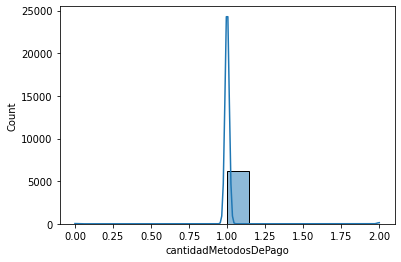

In [ ]:
sns.histplot(data=data, x="cantidadMetodosDePago", kde=True)

Podemos evidenciar que la cantidadMetodosDePago tienen una distribución uniforme hacia el número 1 (la mayoría de personas pagan con un solo método de pago), pero con un número significativo de clientes en 2 métodos de pago por mes, así pues, se observan dos picos, lo que podría indicar dos grupos de personas, pero no es claro, el segundo grupo.

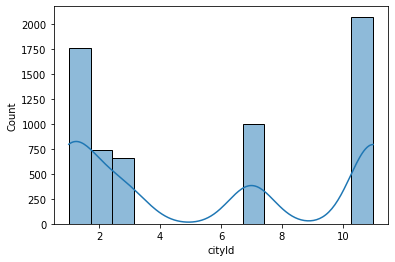

In [ ]:
sns.histplot(data=data, x="cityId", kde=True)

Por otro lado, al analizar el campo de cityId, podemos evidenciar tienen una distribución sesgada hacia la izquierda (la mayoría de los usuarios se encuentran en las ciudades de código 1 a 11), se observan dos picos, lo que podría indicar dos grupos de personas, ubicados en las ciudades 1 y 11, las cuales corresponden a Bogotá y Ciudad de México respectivamente.

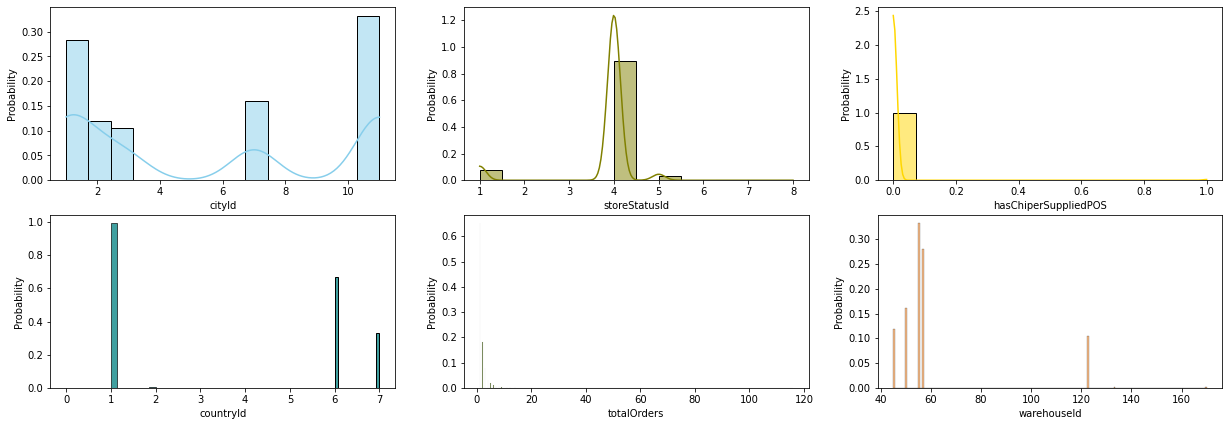

In [ ]:
fig, axs = plt.subplots(2, 3, figsize=(21, 7))

sns.histplot(data=data, x="cityId", kde=True, color="skyblue",stat='probability', ax=axs[0, 0])
sns.histplot(data=data, x="storeStatusId", kde=True, color="olive",stat='probability', ax=axs[0, 1])
sns.histplot(data=data, x="hasChiperSuppliedPOS", kde=True, color="gold",stat='probability', ax=axs[0, 2])
sns.histplot(data=data, x="countryId", kde=False, color="teal",stat='probability', ax=axs[1, 0])
sns.histplot(data=data, x="cantidadMetodosDePago", kde=False, color="teal", stat='probability', ax=axs[1, 0])
sns.histplot(data=data, x="totalOrders", kde=False, color="darkolivegreen", stat='probability', ax=axs[1, 1])
sns.histplot(data=data, x="warehouseId", kde=False, color="sandybrown", stat='probability', ax=axs[1, 2])
plt.show()

[]

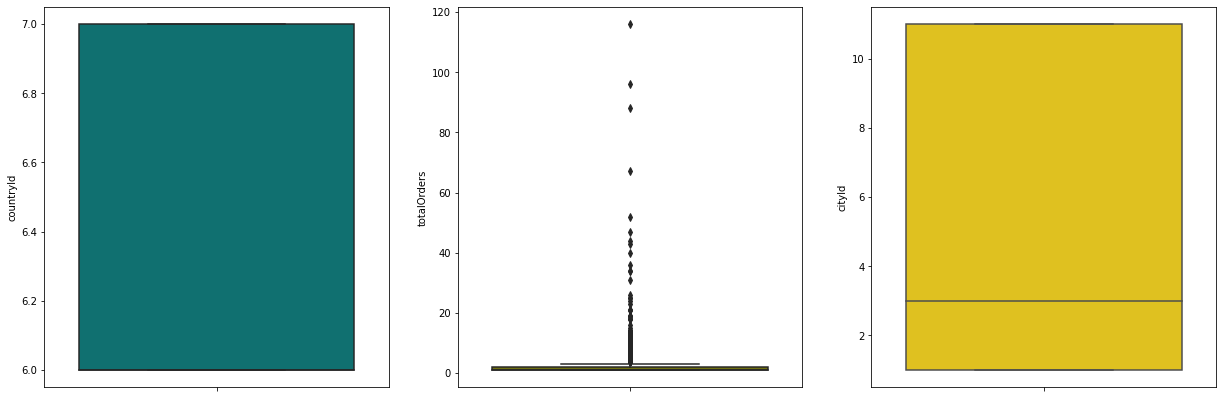

In [ ]:
fig, axs = plt.subplots(1, 3, figsize=(21, 7))

sns.boxplot(data=data, y="countryId", color="teal", ax=axs[0])
sns.boxplot(data=data, y="totalOrders", color="olive", ax=axs[1])
sns.boxplot(data=data, y="cityId", color="gold", ax=axs[2])

plt.plot()

La hipótesis del negocio es que los clientes en riesgo, son quienes no realizan ninguna transacción en el lapso de 30 días. Gráficamos la distribución de costos teniendo en cuenta el total de órdenes por mes.

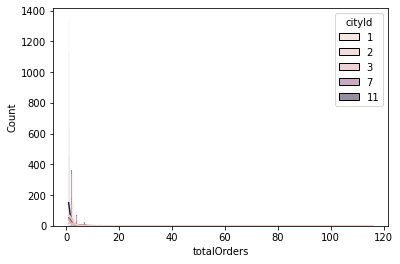

In [ ]:
sns.histplot(data=data, x="totalOrders", hue="cityId", kde=True)

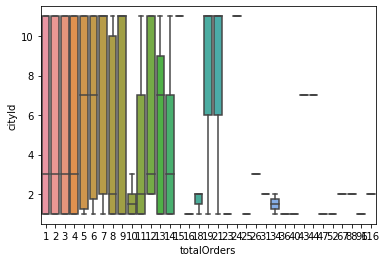

In [ ]:
sns.boxplot(x="totalOrders", y="cityId", data=data)

Se evidencia que el mes del año, si afecta significativamente el total de órdenes creadas ese mes, dónde se evidencia una gran disminución.

###8. Hipótesis
**H0:** Los clientes que no han realizado compras en los últimos 30 días están en riesgo en abandonar la aplicación.

**H1:** Los clientes que han realizado compras en los últimos 30 días No están en riesgo en abandonar la aplicación.

In [ ]:
def permutation_mean(data, col):
  new_col = data[col].sample(frac=1, replace=False).reset_index(drop=True)
  new_data = pd.DataFrame(data['totalOrders'], columns=['totalOrders'])
  new_data[col] = new_col
  means = new_data.groupby(col).mean()
  return means

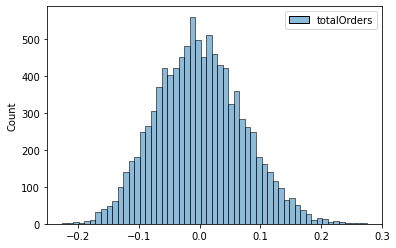

In [ ]:
differences = []
for i in range(10000):
  means_1 = permutation_mean(data, 'churn').loc[1]
  means_2 = permutation_mean(data, 'churn').loc[0]
  differences.append(means_1-means_2)

diff_df = pd.DataFrame(differences)
sns.histplot(diff_df)

In [ ]:
np.quantile(diff_df.values, 0.975)   #un intervalo de confianza de 95% se halla encontrando los cuantiles 2.5 y 97.5 porque hay 95% de diferencia entre estos cuantiles

0.14761815486812066

In [ ]:
np.quantile(diff_df.values, 0.025)

-0.13146082142837426

Al realizar la prueba por permutaciones se observa que la diferencia entre los promedios estaría entre -0.4 y 0.45 si se asume que los clientes que no realizan compras en los últimos 30 días son churn. Por lo cual podemos aceptar la hipotesis nula.

Se grafican las relaciones de otras variables

In [ ]:
#g.sns.FacetGrid(col="totalOrders", data=data)
#g.map(sns.histplot, "city")

In [ ]:
#g = sns.pairplot(data)
#g.map_upper(sns.scatterplot)
#g.map_lower(sns.kdeplot, fill=True)
#g.map_diag(sns.histplot, kde=True)

In [ ]:
data.corr()

,storeId,storeTypeId,totalOrders,totalOrdersUSD,cantidadMetodosDePago,warehouseId,cityId,countryId,locationId,storeStatusId,isActive,hasChiperSuppliedPOS,socialClass,numberOfEmployees,mes,no_days_sin_trans,churn
storeId,1.000000,0.074373,-0.081002,-0.289414,-0.070267,0.076037,0.056419,-0.013304,0.111481,-0.149051,-0.309313,-0.118627,-0.524771,0.539803,NaN,-0.092436,-0.117955
storeTypeId,0.074373,1.000000,-0.017026,0.008594,-0.016436,-0.108276,0.536195,0.573393,0.285590,-0.023484,-0.090582,-0.075716,-0.163998,0.137956,NaN,-0.028723,-0.014432
totalOrders,-0.081002,-0.017026,1.000000,0.463891,0.069066,-0.031719,-0.027407,-0.015775,-0.042028,0.050229,-0.002117,0.034861,0.286910,0.172301,NaN,-0.085739,-0.103051
totalOrdersUSD,-0.289414,0.008594,0.463891,1.000000,0.068641,-0.044437,0.030726,0.045069,-0.016148,0.067117,0.024558,0.067368,0.252513,-0.019441,NaN,-0.041385,-0.043964
cantidadMetodosDePago,-0.070267,-0.016436,0.069066,0.068641,1.000000,-0.062418,-0.025454,-0.026128,-0.027621,0.018710,0.049749,0.088975,0.166667,0.127257,NaN,-0.028754,-0.022283
warehouseId,0.076037,-0.108276,-0.031719,-0.044437,-0.062418,1.000000,-0.202084,-0.189195,0.664866,0.028944,-0.020510,-0.022114,-0.166667,0.068333,NaN,0.069933,0.064859
cityId,0.056419,0.536195,-0.027407,0.030726,-0.025454,-0.202084,1.000000,0.889353,0.561687,-0.062205,-0.080608,-0.005811,0.166667,0.096759,NaN,-0.006586,0.014294
countryId,-0.013304,0.573393,-0.015775,0.045069,-0.026128,-0.189195,0.889353,1.000000,0.465536,-0.045900,-0.054557,-0.006703,NaN,NaN,NaN,-0.019633,-0.005221
locationId,0.111481,0.285590,-0.042028,-0.016148,-0.027621,0.664866,0.561687,0.465536,1.000000,-0.013993,-0.081335,-0.024027,0.166667,0.090203,NaN,0.054919,0.067540
storeStatusId,-0.149051,-0.023484,0.050229,0.067117,0.018710,0.028944,-0.062205,-0.045900,-0.013993,1.000000,0.018278,0.012970,0.166667,-0.286770,NaN,0.041227,-0.004549


La correlación nos indica que existe una relación positiva entre la variable objetivo churn y las variables cityId	y locationId, tienen correlación positiva con la variable objetivo, por lo cual se puede afirmar que son variables decisorias.

###9. Procesamiento y validación Modelo Árboles de Decisión


####Modelo con árboles de decisión, usando grid search

Separación de los datos en las variables X y Y, para el respectivo procesamiento

In [ ]:
X = data.drop(['ultimaOrden','no_days_sin_trans','country','city','churn','storeId','socialClass',	'numberOfEmployees',	'mes'],axis=1)
Y = data['churn']
X.head()

,storeTypeId,totalOrders,totalOrdersUSD,cantidadMetodosDePago,warehouseId,cityId,countryId,locationId,storeStatusId,isActive,hasChiperSuppliedPOS
0,85,1,4671.96,1,45,2,6,3,4.0,1,0
1,81,1,85552.58,1,57,1,6,2,1.0,1,0
2,81,2,25442.06,1,57,1,6,2,4.0,1,0
3,82,1,5746.59,1,57,1,6,2,4.0,1,0
4,81,47,1121529.66,1,57,1,6,2,4.0,0,0


Se normalizan los datos con MinMaxScaler, ya que los datos de totalOrdersUSD son muy disparejos

In [ ]:
estimators = [('normalize',MinMaxScaler()),
              ]
pipe = Pipeline(estimators)
pipe

Pipeline(steps=[('normalize', MinMaxScaler())])

Se genera la transformación en el dataset con el pipe definido anteriormente

In [ ]:
data_mod = pd.DataFrame(pipe.fit_transform(X),columns=X.columns)
data_mod.head()

,storeTypeId,totalOrders,totalOrdersUSD,cantidadMetodosDePago,warehouseId,cityId,countryId,locationId,storeStatusId,isActive,hasChiperSuppliedPOS
0,0.923077,0.000000,0.001329,0.5,0.000,0.1,0.0,0.0625,0.428571,1.0,0.0
1,0.879121,0.000000,0.024385,0.5,0.096,0.0,0.0,0.0000,0.000000,1.0,0.0
2,0.879121,0.008696,0.007249,0.5,0.096,0.0,0.0,0.0000,0.428571,1.0,0.0
3,0.890110,0.000000,0.001635,0.5,0.096,0.0,0.0,0.0000,0.428571,1.0,0.0
4,0.879121,0.400000,0.319702,0.5,0.096,0.0,0.0,0.0000,0.428571,0.0,0.0


Se divide la data en test y train. Además se da formato a los datos que lo requieren



In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(data_mod, Y, test_size=0.3, random_state=1)

In [ ]:
X_train

,storeTypeId,totalOrders,totalOrdersUSD,cantidadMetodosDePago,warehouseId,cityId,countryId,locationId,storeStatusId,isActive,hasChiperSuppliedPOS
994,0.879121,0.017391,0.017868,0.5,0.096,0.0,0.0,0.0000,0.428571,0.0,0.0
361,0.890110,0.000000,0.009404,0.5,0.096,0.0,0.0,0.0000,0.428571,0.0,0.0
3289,0.879121,0.000000,0.000621,0.5,0.040,0.6,0.0,0.3125,0.428571,0.0,0.0
3179,0.879121,0.000000,0.000335,0.5,0.040,0.6,0.0,0.3125,0.000000,0.0,0.0
3746,0.879121,0.034783,0.002987,0.5,0.040,0.6,0.0,0.3125,0.428571,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
905,0.945055,0.008696,0.018858,0.5,0.080,1.0,1.0,0.5625,0.428571,0.0,0.0
5192,0.945055,0.008696,0.002083,0.5,0.080,1.0,1.0,0.5625,0.428571,0.0,0.0
3980,0.945055,0.000000,0.000530,0.5,0.080,1.0,1.0,0.5625,0.000000,0.0,0.0
235,0.879121,0.000000,0.017196,0.5,0.624,0.2,0.0,1.0000,0.428571,0.0,0.0


In [ ]:
Y_train.unique()

array([0, 1])

In [ ]:
X_train['storeTypeId'] = X_train['storeTypeId'].astype('float32')
X_train['totalOrders'] = X_train['totalOrders'].astype('float32')
X_train['totalOrdersUSD'] = X_train['totalOrdersUSD'].astype('float32')
X_train['cantidadMetodosDePago'] = X_train['cantidadMetodosDePago'].astype('float32')
X_train['warehouseId'] = X_train['warehouseId'].astype('float32')
X_train['cityId'] = X_train['cityId'].astype('float32')
X_train['countryId'] = X_train['countryId'].astype('float32')
X_train['locationId'] = X_train['locationId'].astype('float32')
X_train['storeStatusId'] = X_train['storeStatusId'].astype('float32')
X_train['isActive'] = X_train['isActive'].astype('float32')
X_train['hasChiperSuppliedPOS'] = X_train['hasChiperSuppliedPOS'].astype('float32')
							

In [ ]:
X_train.dtypes

storeTypeId              float32
totalOrders              float32
totalOrdersUSD           float32
cantidadMetodosDePago    float32
warehouseId              float32
cityId                   float32
countryId                float32
locationId               float32
storeStatusId            float32
isActive                 float32
hasChiperSuppliedPOS     float32
dtype: object

In [ ]:
np.isnan(X_train.any()) #and gets False

storeTypeId              False
totalOrders              False
totalOrdersUSD           False
cantidadMetodosDePago    False
warehouseId              False
cityId                   False
countryId                False
locationId               False
storeStatusId            False
isActive                 False
hasChiperSuppliedPOS     False
dtype: bool

In [ ]:
np.isfinite(X_train.all()) #and gets True

storeTypeId              True
totalOrders              True
totalOrdersUSD           True
cantidadMetodosDePago    True
warehouseId              True
cityId                   True
countryId                True
locationId               True
storeStatusId            True
isActive                 True
hasChiperSuppliedPOS     True
dtype: bool

In [ ]:
np.any(np.isnan(X_train))

True

In [ ]:
np.all(np.isfinite(X_train))

False

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
X_train = X_train.fillna(X_train.mean())

In [ ]:
clf.fit(X_train, Y_train)

DecisionTreeClassifier()

---------------------------------------------------------------------------------------------

In [ ]:
X_test['storeTypeId'] = X_test['storeTypeId'].astype('float32')
X_test['totalOrders'] = X_test['totalOrders'].astype('float32')
X_test['totalOrdersUSD'] = X_test['totalOrdersUSD'].astype('float32')
X_test['cantidadMetodosDePago'] = X_test['cantidadMetodosDePago'].astype('float32')
X_test['warehouseId'] = X_test['warehouseId'].astype('float32')
X_test['cityId'] = X_test['cityId'].astype('float32')
X_test['countryId'] = X_test['countryId'].astype('float32')
X_test['locationId'] = X_test['locationId'].astype('float32')
X_test['storeStatusId'] = X_test['storeStatusId'].astype('float32')
X_test['isActive'] = X_test['isActive'].astype('float32')
X_test['hasChiperSuppliedPOS'] = X_test['hasChiperSuppliedPOS'].astype('float32')

In [ ]:
X_test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
X_test = X_test.fillna(X_test.mean())

Se prueba la presición del modelo

In [ ]:
Y_test_pred = clf.predict(X_test)

In [ ]:
accuracy_score(Y_test, Y_test_pred)

0.7006948156066275

In [ ]:
#Descargar el archivo para procesamiento REST
from google.colab import files
X_train.to_csv('data_transformed_1.csv') 
files.download('data_transformed_1.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Se define y ejecuta el modelo de clasificación Árboles de Desición

In [ ]:
pd.DataFrame(
  {
    'feature_names': X_train.columns,
    'feature_importances': clf.feature_importances_
  }
).sort_values(
  'feature_importances', ascending=False
).set_index('feature_names')

,feature_importances
feature_names,
totalOrdersUSD,0.706696
storeTypeId,0.086077
storeStatusId,0.075988
totalOrders,0.043660
warehouseId,0.035527
cityId,0.021985
locationId,0.020131
countryId,0.005577
isActive,0.001544


In [ ]:
print(
  export_text(clf, feature_names= ['totalOrdersUSD', 'storeTypeId', 'storeStatusId', 'totalOrders', 'warehouseId',
                                   'cantidadMetodosDePago', 'cityId',	'countryId',	'locationId',	'isActive', 'hasChiperSuppliedPOS'], spacing=3, decimals=1)
) 

|--- locationId <= 0.5
|   |--- storeTypeId <= 0.0
|   |   |--- storeStatusId <= 0.0
|   |   |   |--- locationId <= 0.4
|   |   |   |   |--- storeStatusId <= 0.0
|   |   |   |   |   |--- storeStatusId <= 0.0
|   |   |   |   |   |   |--- hasChiperSuppliedPOS <= 0.5
|   |   |   |   |   |   |   |--- totalOrdersUSD <= 0.9
|   |   |   |   |   |   |   |   |--- storeStatusId <= 0.0
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- storeStatusId >  0.0
|   |   |   |   |   |   |   |   |   |--- storeStatusId <= 0.0
|   |   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |   |--- storeStatusId >  0.0
|   |   |   |   |   |   |   |   |   |   |--- storeStatusId <= 0.0
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- storeStatusId >  0.0
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 4
|   |   |   |   |   |   |   |--- totalOrdersUSD >  0.9
|   |   |   | 

In [ ]:
clf.get_n_leaves()

1311

In [ ]:
clf.get_depth()

46

Se aplica Grid Search para encontrar los mejores parámetros

In [ ]:
data_encoder = X.apply(lambda series: pd.Series( LabelEncoder().fit_transform(series[series.notnull()]), 
                                                index=series[series.notnull()].index ))

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ct = ColumnTransformer([
       ('num', KNNImputer(n_neighbors=5),
       make_column_selector(dtype_include=np.number)),
       ('w',
       KNNImputer(weights='uniform'),
       make_column_selector(dtype_include=object))])

estimators = [('imputer', ct),
              ('normalize',MaxAbsScaler()),
              ('clf', DecisionTreeClassifier(max_depth=46)),
              ]
pipe = Pipeline(estimators)

param_grid = dict(imputer__num__n_neighbors=[5,7,8],
                  imputer__w__weights=['uniform', 'distance'],
                  clf__criterion=['gini', 'entropy'],
                  clf__splitter=['best','random'],
                  clf__max_depth=[5,10,20,26,30,37,40,46,54],
                  normalize=['passthrough', MaxAbsScaler(), MinMaxScaler()])

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

grid_search.fit(data_encoder,Y.ravel())

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
[CV 1/5] END clf__criterion=gini, clf__max_depth=5, clf__splitter=best, imputer__num__n_neighbors=5, imputer__w__weights=uniform, normalize=passthrough;, score=0.752 total time=   0.1s
[CV 2/5] END clf__criterion=gini, clf__max_depth=5, clf__splitter=best, imputer__num__n_neighbors=5, imputer__w__weights=uniform, normalize=passthrough;, score=0.735 total time=   0.1s
[CV 3/5] END clf__criterion=gini, clf__max_depth=5, clf__splitter=best, imputer__num__n_neighbors=5, imputer__w__weights=uniform, normalize=passthrough;, score=0.666 total time=   0.1s
[CV 4/5] END clf__criterion=gini, clf__max_depth=5, clf__splitter=best, imputer__num__n_neighbors=5, imputer__w__weights=uniform, normalize=passthrough;, score=0.695 total time=   0.1s
[CV 5/5] END clf__criterion=gini, clf__max_depth=5, clf__splitter=best, imputer__num__n_neighbors=5, imputer__w__weights=uniform, normalize=passthrough;, score=0.701 total time=   0.0s
[CV 1/5] EN

In [ ]:
print(grid_search.best_params_)

{'clf__criterion': 'entropy', 'clf__max_depth': 5, 'clf__splitter': 'random', 'imputer__num__n_neighbors': 7, 'imputer__w__weights': 'uniform', 'normalize': MaxAbsScaler()}


In [ ]:
resultados = pd.DataFrame(grid_search.cv_results_)
display(resultados)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_clf__criterion,param_clf__max_depth,param_clf__splitter,param_imputer__num__n_neighbors,param_imputer__w__weights,param_normalize,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.054496,0.016126,0.013040,0.004305,gini,5,best,5,uniform,passthrough,"{'clf__criterion': 'gini', 'clf__max_depth': 5...",0.751603,0.734563,0.666399,0.695269,0.700882,0.709743,0.030116,72
1,0.045543,0.007152,0.011454,0.004217,gini,5,best,5,uniform,MaxAbsScaler(),"{'clf__criterion': 'gini', 'clf__max_depth': 5...",0.751603,0.734563,0.666399,0.695269,0.700882,0.709743,0.030116,72
2,0.050022,0.011232,0.013163,0.004629,gini,5,best,5,uniform,MinMaxScaler(),"{'clf__criterion': 'gini', 'clf__max_depth': 5...",0.751603,0.733761,0.666399,0.695269,0.700882,0.709583,0.029986,83
3,0.043245,0.003462,0.011459,0.004688,gini,5,best,5,distance,passthrough,"{'clf__criterion': 'gini', 'clf__max_depth': 5...",0.751603,0.734563,0.666399,0.695269,0.700882,0.709743,0.030116,72
4,0.042773,0.001344,0.011413,0.004569,gini,5,best,5,distance,MaxAbsScaler(),"{'clf__criterion': 'gini', 'clf__max_depth': 5...",0.751603,0.734563,0.666399,0.695269,0.700882,0.709743,0.030116,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
643,0.049018,0.008455,0.012771,0.005041,entropy,54,random,8,uniform,MaxAbsScaler(),"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.621795,0.635926,0.593424,0.646351,0.630313,0.625562,0.017940,569
644,0.043355,0.004313,0.012244,0.005657,entropy,54,random,8,uniform,MinMaxScaler(),"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.627404,0.639134,0.602245,0.649559,0.632719,0.630212,0.015813,423
645,0.047492,0.008532,0.013468,0.004602,entropy,54,random,8,distance,passthrough,"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.635417,0.625501,0.593424,0.643945,0.682438,0.636145,0.028785,267
646,0.047790,0.008036,0.012987,0.005975,entropy,54,random,8,distance,MaxAbsScaler(),"{'clf__criterion': 'entropy', 'clf__max_depth'...",0.617788,0.629511,0.600642,0.645549,0.636728,0.626044,0.015621,556


####Realizamos una función para la predicción

In [ ]:
def pred(X_test, clf):
    # Predicton on test with giniIndex
    Y_pred = clf.predict(X_test)
    print("Predicted values:")
    print(Y_pred)
    return Y_pred

In [ ]:
pred(X_test,clf)[0:1]

Predicted values:
[0 0 0 ... 0 1 0]


array([0])

Función para calcular las métricas

In [ ]:
def metricas(Y_test, Y_pred):
    print("Matriz de confusión: ",
        confusion_matrix(Y_test, Y_pred))
      
    print ("Precisión : ",
    accuracy_score(Y_test, Y_pred)*100)
      
    print("Reporte : ",
    classification_report(Y_test, Y_pred))

Reporte para el Mejor Modelo Árboles de Decisión

In [ ]:
print(metricas(Y_test,pred(X_test,clf)))

Predicted values:
[0 0 0 ... 0 1 0]
Matriz de confusión:  [[1057  278]
 [ 282  254]]
Precisión :  70.06948156066275
Reporte :                precision    recall  f1-score   support

           0       0.79      0.79      0.79      1335
           1       0.48      0.47      0.48       536

    accuracy                           0.70      1871
   macro avg       0.63      0.63      0.63      1871
weighted avg       0.70      0.70      0.70      1871

None


###10. Procesamiento y Validación Random Forest

####Modelo con random forest, usando grid search

Crear el objeto random forest

In [ ]:
rf = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rf

RandomForestClassifier(n_estimators=1000, random_state=42)

Ajustar los datos

In [ ]:
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
ct = ColumnTransformer([
       ('num', KNNImputer(n_neighbors=5),
       make_column_selector(dtype_include=np.number)),
       ('w',
       KNNImputer(weights='uniform'),
       make_column_selector(dtype_include=object))])

estimators = [('imputer', ct),
              ('normalize',MaxAbsScaler()),
              ('rf', RandomForestClassifier(n_estimators=1000)),
              ]
pipe = Pipeline(estimators)

param_grid = dict(imputer__num__n_neighbors=[5,7,8],
                  imputer__w__weights=['uniform', 'distance'],
                  clf__criterion=['gini', 'entropy'],
                  clf__splitter=['best','random'],
                  n_estimators=[10,100,500,,30,37,40,46,54],
                  normalize=['passthrough', MaxAbsScaler(), MinMaxScaler()])

grid_search = GridSearchCV(pipe, param_grid=param_grid,cv=5,verbose=3,scoring='accuracy')

grid_search.fit(data_encoder,Y.ravel())

Funciones para el modelo

In [ ]:
# Realizamos una función para la predicción
def pred(X_test, clf):
    # Predicton on test with giniIndex
    Y_pred = clf.predict(X_test)
    return Y_pred

# Función para calcular las métricas
def metricas(Y_test, Y_pred):
    print("Matriz de confusión: ",
        confusion_matrix(Y_test, Y_pred))
      
    print ("Precisión : ",
    accuracy_score(Y_test, Y_pred)*100)
      
    print("Reporte : ",
    classification_report(Y_test, Y_pred))

In [ ]:
# Predecir el árbol de decisión
pred(X_test, rf)[0:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0])

In [ ]:
Y_pred=pred(X_test, rf)

Reporte para el Mejor Modelo Random Forest

In [ ]:
metricas(Y_test, Y_pred)

Matriz de confusión:  [[1077  258]
 [ 285  251]]
Precisión :  70.97808658471406
Reporte :                precision    recall  f1-score   support

           0       0.79      0.81      0.80      1335
           1       0.49      0.47      0.48       536

    accuracy                           0.71      1871
   macro avg       0.64      0.64      0.64      1871
weighted avg       0.71      0.71      0.71      1871

